In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/regression-with-a-wild-blueberry-yield-prediction/sample_submission.csv
/kaggle/input/regression-with-a-wild-blueberry-yield-prediction/train.csv
/kaggle/input/regression-with-a-wild-blueberry-yield-prediction/test.csv


## Build a Model on The Train Data

In [21]:
## import libraries to use
import math 
import pickle #To save a model 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Processing 
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures,SplineTransformer,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

## Libraries for modelling 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

# Other utilities
import warnings
warnings.filterwarnings(action='ignore')

### Step 1 Explore and Visualize my Data 

In [6]:
train = pd.read_csv('/kaggle/input/regression-with-a-wild-blueberry-yield-prediction/train.csv')
train.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.335530,0.376880,28.282868,3387.78516
1,1,385.0,12.5,0.25,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.584016,0.488639,40.813181,7861.46538
2,2,672.0,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.494907,0.424657,35.923314,6030.98074
3,3,643.0,25.0,0.50,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.476365,0.428771,33.847079,5628.88280
4,4,546.0,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.346411,0.355876,27.621548,3502.08292


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [8]:
## Data Summary 
train.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,425.653467,19.749000,0.385026,0.283783,0.486811,0.588761,82.304060,49.751320,68.764127,59.324360,28.71126,48.646047,18.612485,0.324699,0.499336,0.445325,36.055778,5997.947020
std,4330.271354,214.451796,6.638017,0.308241,0.058842,0.149147,0.146907,9.157673,5.553542,7.649689,6.617508,3.22611,5.397238,11.926713,0.167244,0.078182,0.038683,4.127429,1370.663747
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,37.000000,55.900000,50.200000,24.30000,41.200000,1.000000,0.010000,0.192732,0.192732,22.079199,1637.704020
25%,3749.750000,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.00000,45.800000,16.000000,0.260000,0.450103,0.417909,33.221987,5046.457340
50%,7499.500000,466.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.00000,50.800000,16.000000,0.260000,0.504435,0.445494,35.933802,6097.778010
75%,11249.250000,597.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.00000,50.800000,24.000000,0.390000,0.561190,0.471829,39.091856,7022.189730
max,14999.000000,776.000000,37.500000,18.430000,0.585000,0.750000,0.750000,99.400000,57.200000,79.000000,68.200000,68.20000,62.000000,34.000000,0.560000,0.833158,0.755061,46.369344,8969.401840


## Step 2 : EDA 

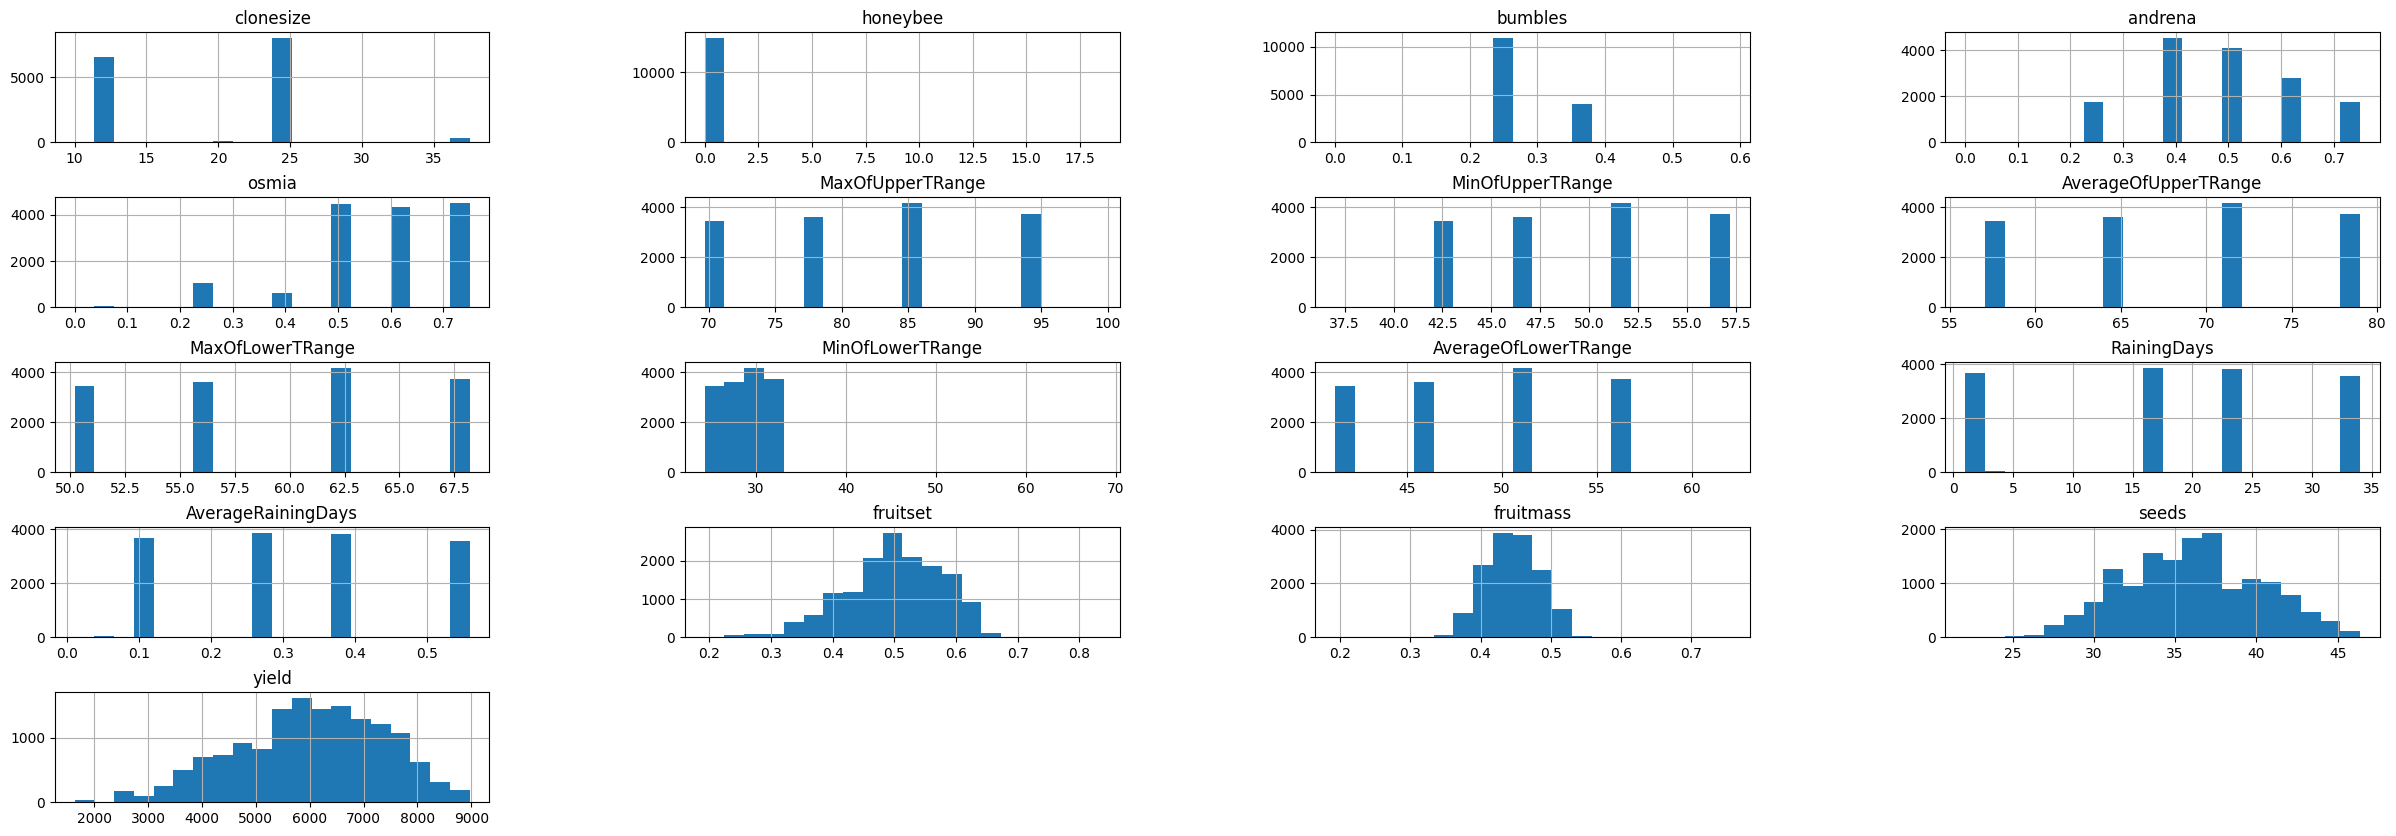

In [23]:
## Distribution of my features 
## histograms - numerical 
## kde
# train.drop('Row#',axis=1,inplace=True)
train.hist(figsize=(30,10),bins=20)
plt.subplots_adjust(hspace=0.5,wspace=0.45)


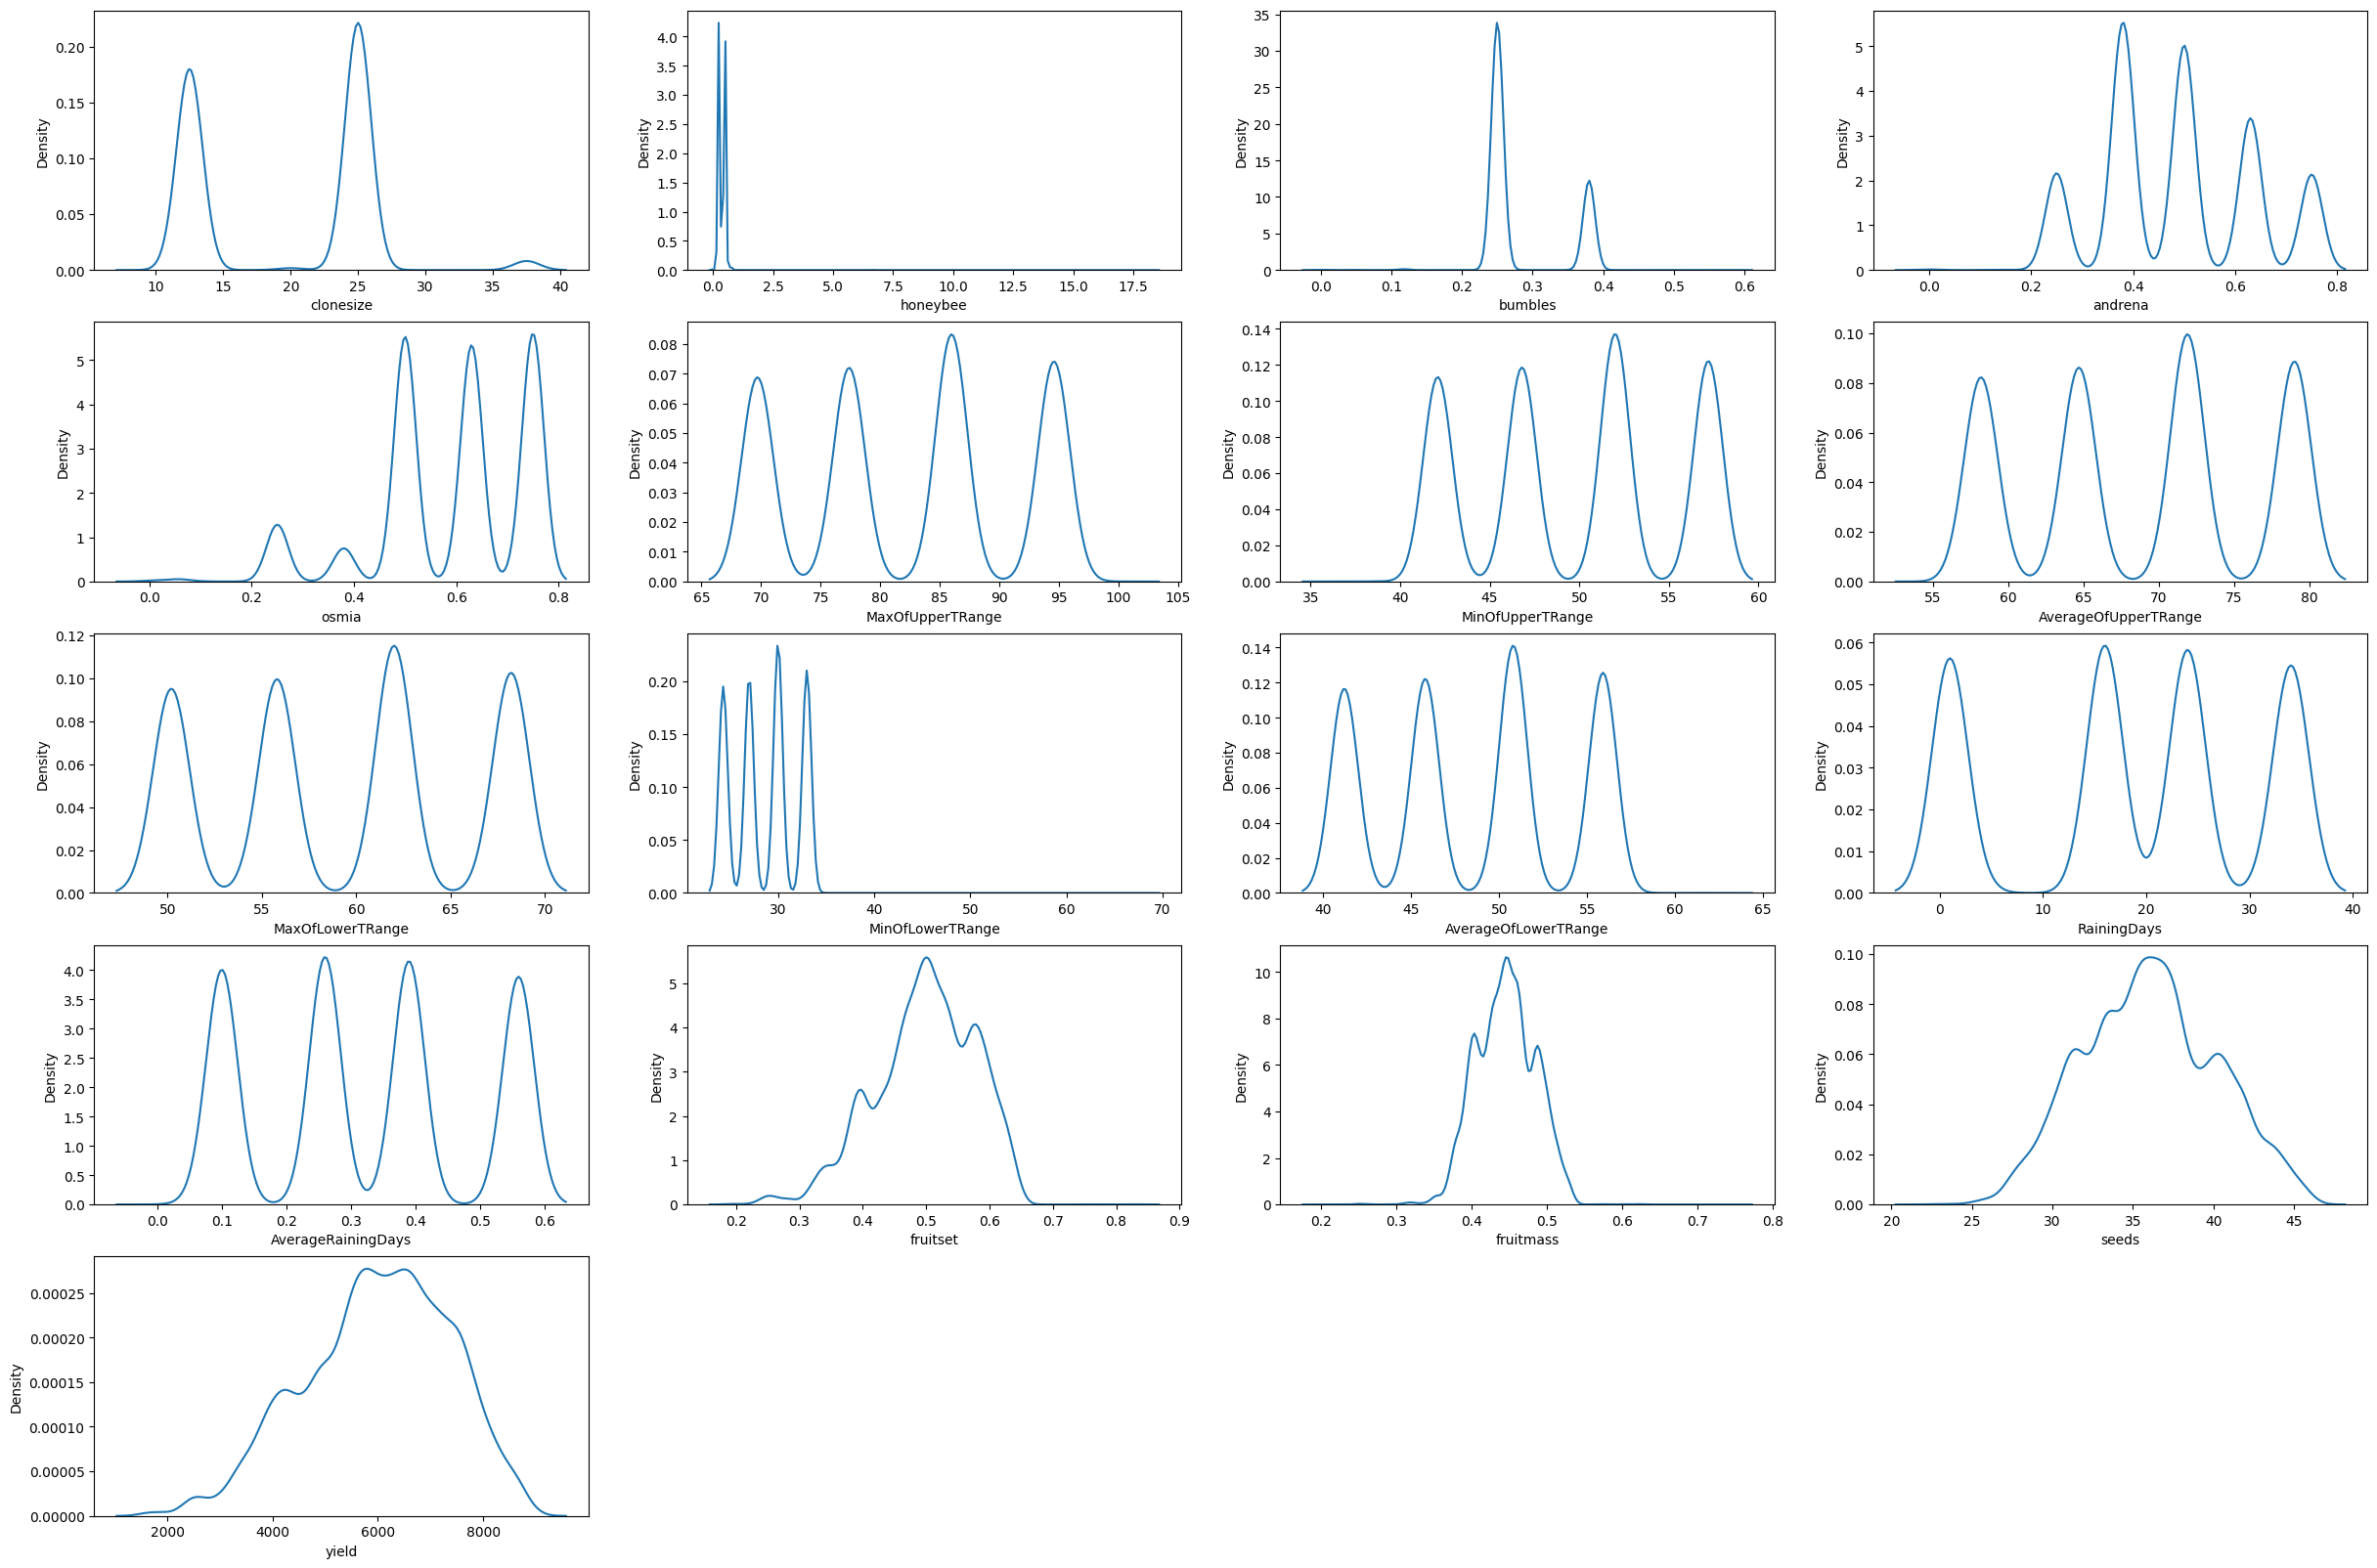

In [22]:
## kde plot 
fig = plt.figure(figsize=(30,20))
for i in range(len(train.columns)):
    ax=fig.add_subplot(5,4,i+1)
    sns.kdeplot(train[train.columns[i]])

In [47]:
len(train.columns)
train.columns[1:16]

Index(['honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange',
       'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange',
       'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays',
       'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds'],
      dtype='object')

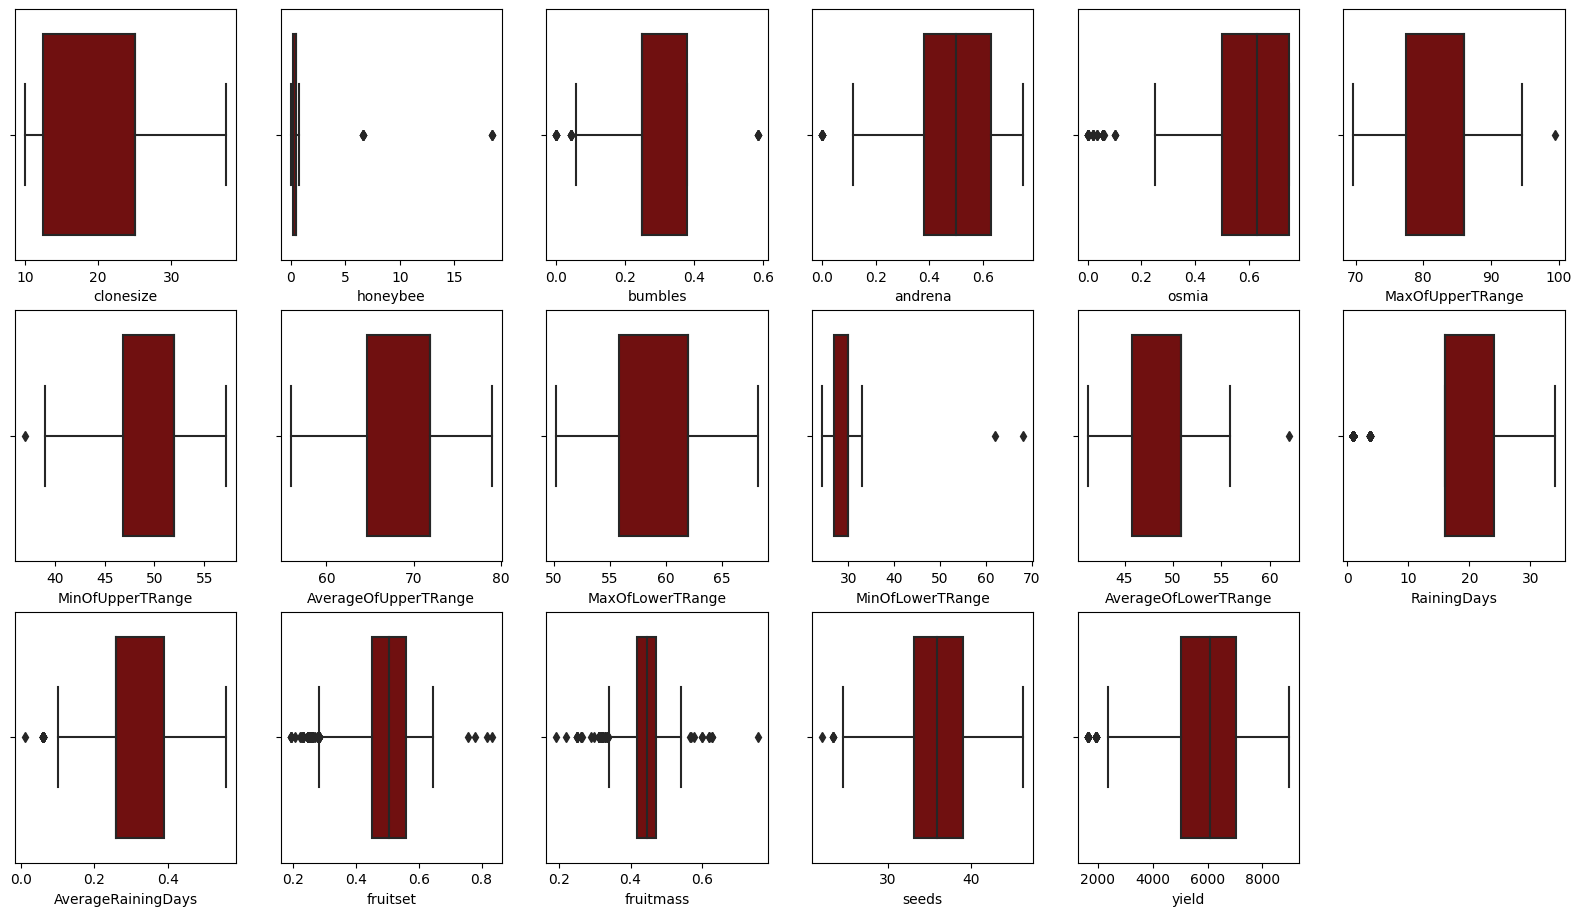

In [44]:
## Outliers 
# Univariate analysis of the numerical variables 
fig = plt.figure(figsize=(20,15))
for i,j in zip(train.columns,range(18)): 
    ax=fig.add_subplot(4,6,j+1)
    sns.boxplot(data=train,x=train[i],orient='v',color='maroon')

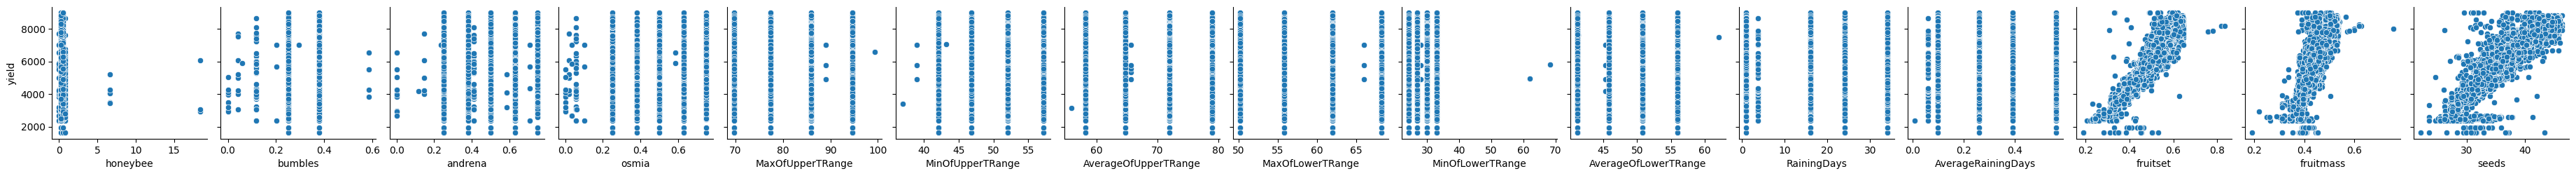

In [55]:
## Relationships with y_variable 
sns.pairplot(data=train,
             x_vars=train.columns[1:16],
             y_vars='yield')

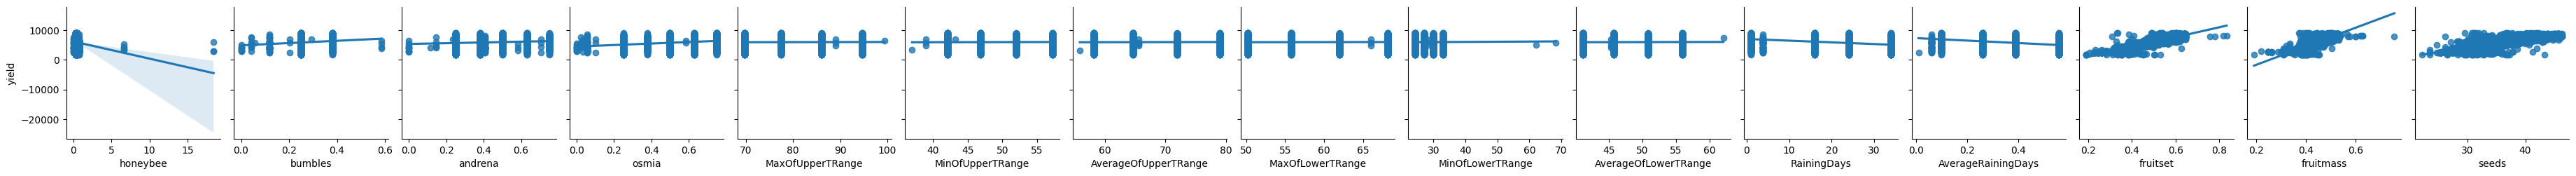

In [66]:
sns.pairplot(data=train,
             x_vars=train.columns[1:16],
             y_vars='yield',
             kind='reg')

## Step 3 : Data Preprocessing

In [62]:
## Scale 
scaler=StandardScaler()
train_scaled=scaler.fit_transform(train)
train_scaled=pd.DataFrame(train_scaled,columns=train.columns).head()

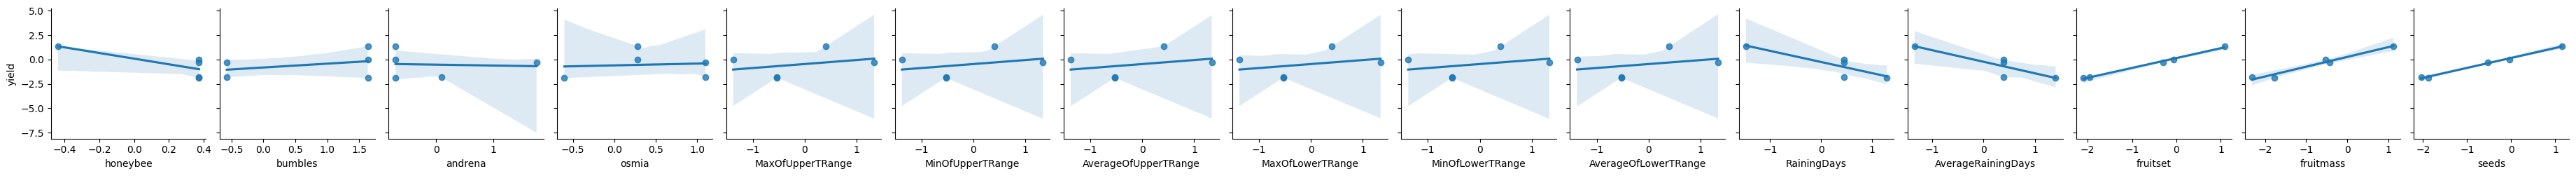

In [65]:
## Relationships with y_variable 
sns.pairplot(data=train_scaled,
             x_vars=train_scaled.columns[1:16],
             y_vars='yield',
             kind='reg')

In [ ]:
## Feature Transformations - Polynomial,Custom,Spline 

## Step 4:Model Selection

In [72]:
## split my data 
X=train[train.columns[1:16]]
y=train['yield']
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=57,test_size=.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10500, 15) (10500,) (4500, 15) (4500,)


In [73]:
# build a base model 
## Define Linear Reg Model 
reg_model= LinearRegression()
reg_model.fit(x_train,y_train)

y_pred = reg_model.predict(x_test)
print(("-")*50)
print("R2 Score",r2_score(y_pred,y_test))
print("MSE",(mean_squared_error(y_pred,y_test)))
print("RMSE",math.sqrt(mean_squared_error(y_pred,y_test)))

--------------------------------------------------
R2 Score 0.9062595831085063
MSE 156480.73787625018
RMSE 395.5764627429824


In [74]:
## we can also get the model coefficients
print("Model Coefficients ", reg_model.coef_)
print("The y_intercept ",reg_model.intercept_)

Model Coefficients  [-7.66659287e+00  1.41108190e+02  8.33955768e-01  1.50895752e+02
  3.52659638e+02 -3.96013296e+01 -1.41896736e+01 -4.46214821e+02
  1.28748511e+01 -5.32334808e+00  6.12734297e+00 -6.56390742e+02
  1.32724483e+04 -3.14209682e+03  9.02956625e+01]
The y_intercept  -2229.679715967578


In [75]:
## model slection using cross validation 
## Cross validated Modelling 
scores = cross_val_score(LinearRegression(),
                        x_train,y_train,
                        cv=5,
                        scoring='r2')   
print(scores,scores.mean())

[0.88520768 0.91389455 0.91344058 0.91400625 0.88900264] 0.9031103389548847


In [94]:
## Ridge
pipe = make_pipeline(RobustScaler(),
                    Ridge(alpha=10))
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.88508565 0.91376961 0.91325576 0.91581256 0.90733295] 0.9070513063008621


### Step 6: Fit and Exporting Your Final Model 

In [106]:
      from pathlib import Path
      Path('/kaggle/working/main_folder/sub_folder').mkdir(parents=True, exist_ok=True)

In [122]:
X=train[train.columns[0:16]]
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.335530,0.376880,28.282868
1,12.5,0.25,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.584016,0.488639,40.813181
2,25.0,0.50,0.38,0.38,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.494907,0.424657,35.923314
3,25.0,0.50,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.476365,0.428771,33.847079
4,25.0,0.50,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.346411,0.355876,27.621548


In [123]:
# Chose the best model fit it with the entire train dataset, because it is this model that we will use to predict the test 
model= make_pipeline(RobustScaler(),
                    Ridge(alpha=10)).fit(X,y)
pickle.dump(model,open('/kaggle/working/model.sav','wb'))

In [125]:
## load my test data 
test = pd.read_csv('/kaggle/input/regression-with-a-wild-blueberry-yield-prediction/test.csv')
test.head()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15000,583.0,25.0,0.50,0.25,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,34.0,0.56,0.320417,0.370488,28.948699
1,15001,246.0,12.5,0.25,0.25,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.527743,0.464892,37.782374
2,15002,631.0,25.0,0.50,0.25,0.75,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.404446,0.408445,31.130213
3,15003,399.0,12.5,0.25,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.603525,0.504527,42.409507
4,15004,454.0,25.0,0.50,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.376804,0.396602,30.767109


In [129]:
## load my model and make predictions using the fitted model 
loaded_model=pickle.load(open('/kaggle/working/model.sav','rb'))
loaded_model

Pipeline(steps=[('robustscaler', RobustScaler()), ('ridge', Ridge(alpha=10))])

In [130]:
# use the mdoel to predict test data 
test_x=test.drop(['id','Row#'],axis=1)
y_pred = loaded_model.predict(test_x)
y_pred.shape

(10000,)

In [148]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['yield']=y_pred
submission.head()

,id,yield
0,15000,3193.905916
1,15001,6452.706339
2,15002,4463.309297
3,15003,7795.688700
4,15004,4034.686701


In [147]:
submission.to_csv('/kaggle/working/submission.csv')